In [1]:
import earthkit.hydro as ekh
import numpy as np
import matplotlib.pyplot as plt

network = ekh.river_network.load("efas", "5", use_cache=False)

Cache disabled.


# Creating subnetworks

For many analyses, one is not interested in the full river network, but only in a certain region such as a catchment. It is possible to create a subnetwork using the `subnetwork` module to achieve this.

Here, we create a boolean mask of a large catchment.

In [2]:
node_mask = ekh.catchments.array.find(network, locations = {"gauge_1": (42.225, 50.24)})
# has nans for missing, and 0s for the catchment
# => convert to boolean mask
node_mask = node_mask == 0
node_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

We create the subnetwork object using this node mask. Edge masks are also possible, but we do not show this example here.

In [3]:
subnetwork = ekh.subnetwork.from_mask(network, node_mask=node_mask)

To illustrate the differences, we print the network sizes. Note that the shape is unchanged since the domain is unchanged.

In [4]:
print("Original:", network.n_nodes, "nodes", network.n_edges, "edges", network.shape, "shape")
print("Subnetwork:", subnetwork.n_nodes, "nodes", subnetwork.n_edges, "edges", network.shape, "shape")

Original: 7446075 nodes 7353055 edges (2970, 4530) shape
Subnetwork: 545096 nodes 545095 edges (2970, 4530) shape


We also plot the result of an upstream sum to illustrate the difference between the two networks.

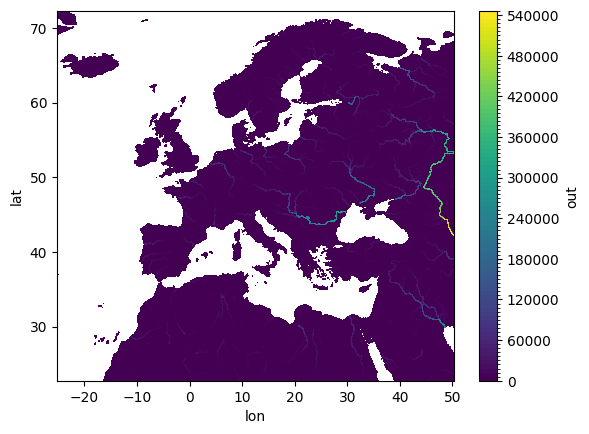

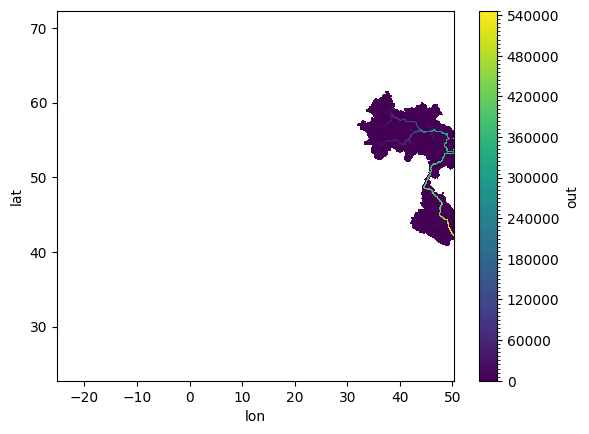

In [5]:
network_da = ekh.upstream.sum(network, np.ones(network.shape))

network_da.plot.contourf(cmap="viridis", levels=100)
plt.show()

subnetwork_da = ekh.upstream.sum(subnetwork, np.ones(subnetwork.shape))

subnetwork_da.plot.contourf(cmap="viridis", levels=100)
plt.show()

However, we can see that the river network domain is extremely large for this subcatchment. It is possible to crop the domain using the `subnetwork.crop` method.

In [6]:
cropped_subnetwork = ekh.subnetwork.crop(subnetwork)

In [7]:
print(cropped_subnetwork.shape, "shape")

(1244, 1097) shape


We can now see that the domain is suitably cropped with a much smaller shape.

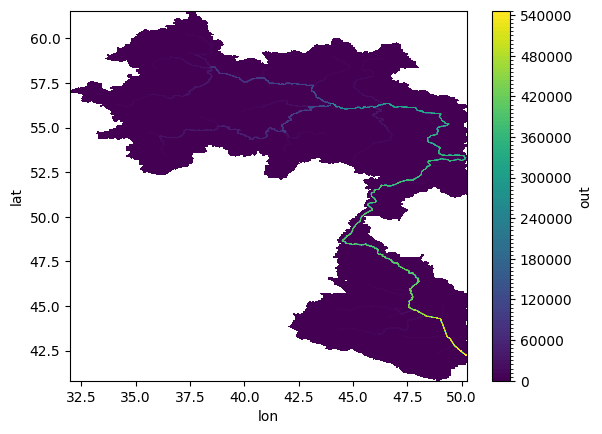

In [8]:
subnetwork_da = ekh.upstream.sum(cropped_subnetwork, np.ones(cropped_subnetwork.shape))

subnetwork_da.plot.contourf(cmap="viridis", levels=100)
plt.show()